In [2]:
import pandas as pd
from pandas import datetime 
from pmdarima import auto_arima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error as mse
from math import sqrt
import matplotlib.pyplot as plt

In [3]:
file='C:\\Users\\kb0365\\Time Series Analysis\\MemoryUtilization1.csv'
df_Memory=pd.read_csv(file) 
# convert datetime datatype
df_Memory['Timestamp'] = pd.to_datetime(df_Memory['Timestamp']) 
df_Memory['hr'] = df_Memory['Timestamp'].apply(lambda x:x.hour)
df_Memory['Date']= df_Memory['Timestamp'].apply(lambda x:x.date())
df_Memory['value']=df_Memory['Maximum']
# Remove Unwanted column
del df_Memory['Unit']
del df_Memory['Timestamp'] 
del df_Memory['Maximum']
df_Memory['Date_Hr'] = df_Memory[['Date','hr']].apply(lambda x : '{}{}'.format(x[0],x[1]), axis=1) 
#df_perc_5=preparePercentileData(df_Memory,5) 
#df_perc_90=preparePercentileData(df_Memory,90)  

In [4]:
df_Memory

,hr,Date,value,Date_Hr
0,0,2018-08-01,21.100975,2018-08-010
1,0,2018-08-01,21.090166,2018-08-010
2,0,2018-08-01,21.097491,2018-08-010
3,0,2018-08-01,21.100005,2018-08-010
4,0,2018-08-01,21.089546,2018-08-010
5,0,2018-08-01,21.089071,2018-08-010
6,0,2018-08-01,21.101919,2018-08-010
7,0,2018-08-01,21.091315,2018-08-010
8,0,2018-08-01,21.103800,2018-08-010
9,0,2018-08-01,21.099755,2018-08-010


In [5]:
def hourlyPercentileDataPrepare(group_testdata,percentile):
    perConvert=percentile/100
    group_testdata['sequence']=group_testdata.groupby('Date_Hr').cumcount()
    group_testdata['sequence']=group_testdata['sequence']+1
    group_testdata['count_max'] = group_testdata.groupby(['Date_Hr'])['sequence'].transform(max)
    group_testdata['percentile'] =round(perConvert*group_testdata['count_max'])  
    group_testdata['PrecentileInput']=percentile
    df_percentileOutput= group_testdata[(group_testdata.sequence == group_testdata.percentile)]
    return(df_percentileOutput)

In [6]:
def dailyPercentileDataPrepare(df_Memory_test,percentile):
    perConvert=percentile/100
    df_Memory_test['sequence']=df_Memory_test.groupby('Date').cumcount()
    df_Memory_test['sequence']=df_Memory_test['sequence']+1
    df_Memory_test['count_max'] =df_Memory_test.groupby(['Date'])['sequence'].transform(max)
    df_Memory_test['percentile'] =round(perConvert*df_Memory_test['count_max']) 
    df_Memory_test['PrecentileInput']=percentile
    df_percentileOutput= df_Memory_test[(df_Memory_test.sequence == df_Memory_test.percentile)]
    return(df_percentileOutput)

In [17]:
def modelFit(df_percentileOutput,Interval,percentile):  
    train = df_percentileOutput[:int(0.7*(len(df_percentileOutput)))]
    valid = df_percentileOutput[int(0.7*(len(df_percentileOutput))):]
    fitModel = auto_arima(train['value'], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=7,
                           start_P=0,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True,
                           stepwise=True)
    print("AIC of a model:",fitModel.aic())
    fitModel.fit(train['value'])
    future_forecast = fitModel.predict(n_periods=Interval)
    actual= valid['value'].head(Interval)
    actual_date= valid['Date_Hr'].head(Interval)
    data_df={'Date_Hr':actual_date,'Actual':actual,'Predicted':future_forecast,'Percentile':percentile}
    results=pd.DataFrame(data=data_df)
    mse_val=mse(actual,future_forecast)
    print("MSE:",mse_val)
    rmse=sqrt(mse_val)
    print("RMSE:",rmse)
    plt.plot(results['Actual'])
    plt.plot(results['Predicted'],color='red')
    plt.xlabel('Years')
    plt.ylabel('Values')
    plt.show()
    print(results)
    results.to_csv('output.csv',sep=',', encoding='utf-8')

In [18]:
df_percentileOutputhr_60=hourlyPercentileDataPrepare(df_Memory,60)
df_percentileOutputhr_70=hourlyPercentileDataPrepare(df_Memory,70)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=6842.837, BIC=6869.525, Fit time=2.511 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=7987.362, BIC=7998.037, Fit time=0.066 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=7466.493, BIC=7487.844, Fit time=0.495 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=6842.961, BIC=6864.311, Fit time=1.883 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=6844.082, BIC=6876.107, Fit time=6.306 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=7903.623, BIC=7924.973, Fit time=0.713 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=6844.276, BIC=6876.302, Fit time=6.396 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=6846.836, BIC=6884.199, Fit time=3.550 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=6843.151, BIC=6875.176, Fit time=2.284 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_o

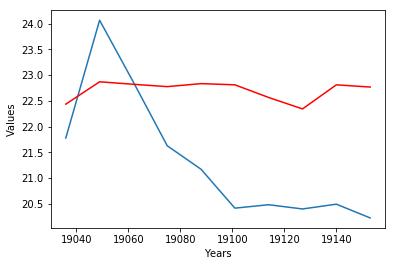

            Date_Hr     Actual  Predicted  Percentile
19036   2018-10-049  21.776283  22.434365          60
19049  2018-10-0410  24.064747  22.869181          60
19062  2018-10-0411  22.860754  22.820353          60
19075  2018-10-0412  21.625687  22.774917          60
19088  2018-10-0413  21.169427  22.833200          60
19101  2018-10-0414  20.414159  22.810195          60
19114  2018-10-0415  20.480585  22.563800          60
19127  2018-10-0416  20.398143  22.341848          60
19140  2018-10-0417  20.491282  22.809943          60
19153  2018-10-0418  20.224313  22.766805          60


In [19]:
modelFit(df_percentileOutputhr_60,10,60)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=6778.980, BIC=6805.668, Fit time=2.108 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=7883.245, BIC=7893.920, Fit time=0.062 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=7388.934, BIC=7410.284, Fit time=0.438 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=6780.922, BIC=6802.272, Fit time=2.503 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=6780.627, BIC=6812.652, Fit time=5.263 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=7824.282, BIC=7845.633, Fit time=0.446 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=6780.617, BIC=6812.642, Fit time=6.428 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=6783.161, BIC=6820.524, Fit time=4.091 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=6792.829, BIC=6824.854, Fit time=1.758 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_o

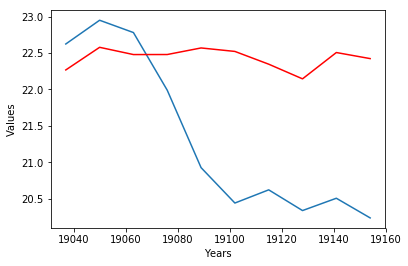

            Date_Hr     Actual  Predicted  Percentile
19037   2018-10-049  22.625164  22.268406          70
19050  2018-10-0410  22.951484  22.579482          70
19063  2018-10-0411  22.782266  22.479841          70
19076  2018-10-0412  21.989648  22.480381          70
19089  2018-10-0413  20.925884  22.570641          70
19102  2018-10-0414  20.439354  22.522989          70
19115  2018-10-0415  20.620668  22.347596          70
19128  2018-10-0416  20.335895  22.146086          70
19141  2018-10-0417  20.505126  22.507728          70
19154  2018-10-0418  20.234832  22.424336          70


In [20]:
modelFit(df_percentileOutputhr_70,10,70)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=6842.837, BIC=6869.525, Fit time=2.382 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=7987.362, BIC=7998.037, Fit time=0.063 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=7466.493, BIC=7487.844, Fit time=0.505 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=6842.961, BIC=6864.311, Fit time=1.472 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=6844.082, BIC=6876.107, Fit time=3.854 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=7903.623, BIC=7924.973, Fit time=0.377 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=6844.276, BIC=6876.302, Fit time=5.021 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=6846.836, BIC=6884.199, Fit time=3.086 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=6843.151, BIC=6875.176, Fit time=2.140 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_o

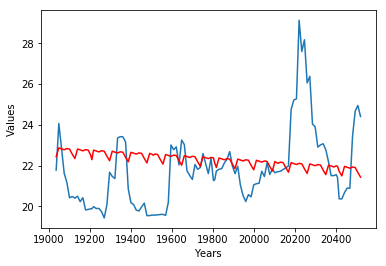

            Date_Hr     Actual  Predicted  Percentile
19036   2018-10-049  21.776283  22.434365          60
19049  2018-10-0410  24.064747  22.869181          60
19062  2018-10-0411  22.860754  22.820353          60
19075  2018-10-0412  21.625687  22.774917          60
19088  2018-10-0413  21.169427  22.833200          60
19101  2018-10-0414  20.414159  22.810195          60
19114  2018-10-0415  20.480585  22.563800          60
19127  2018-10-0416  20.398143  22.341848          60
19140  2018-10-0417  20.491282  22.809943          60
19153  2018-10-0418  20.224313  22.766805          60
19166  2018-10-0419  20.420441  22.722287          60
19179  2018-10-0420  19.817320  22.780663          60
19192  2018-10-0421  19.843683  22.757608          60
19204  2018-10-0422  19.874989  22.511138          60
19210  2018-10-0423  19.877351  22.289107          60
19218   2018-10-050  19.981444  22.757122          60
19231   2018-10-051  19.889177  22.713904          60
19244   2018-10-052  19.8936

In [22]:
modelFit(df_percentileOutputhr_60,120,60)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=6778.980, BIC=6805.668, Fit time=3.932 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=7883.245, BIC=7893.920, Fit time=0.103 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=7388.934, BIC=7410.284, Fit time=0.794 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=6780.922, BIC=6802.272, Fit time=2.124 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=6780.627, BIC=6812.652, Fit time=3.951 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=7824.282, BIC=7845.633, Fit time=0.245 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=6780.617, BIC=6812.642, Fit time=5.284 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=6783.161, BIC=6820.524, Fit time=3.701 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=6792.829, BIC=6824.854, Fit time=1.728 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_o

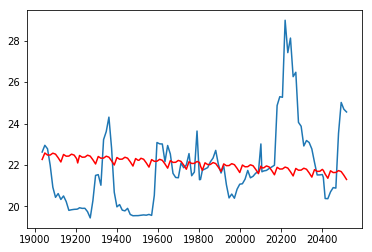

          Actual  Predicted
19037  22.625164  22.268406
19050  22.951484  22.579482
19063  22.782266  22.479841
19076  21.989648  22.480381
19089  20.925884  22.570641
19102  20.439354  22.522989
19115  20.620668  22.347596
19128  20.335895  22.146086
19141  20.505126  22.507728
19154  20.234832  22.424336
19167  19.810609  22.430057
19180  19.839381  22.521929
19193  19.859250  22.474737
19205  19.865790  22.299434
19210  19.877351  22.097894
19219  19.936043  22.459468
19232  19.905912  22.375994
19245  19.909752  22.381630
19258  19.745589  22.473415
19271  19.445342  22.426137
19284  20.280299  22.250747
19297  21.497232  22.049119
19310  21.534344  22.410606
19323  21.022804  22.327046
19336  23.224049  22.332594
19349  23.614174  22.424292
19362  24.309728  22.376927
19375  22.809645  22.201450
19388  20.686183  21.999735
19401  19.978890  22.361135
...          ...        ...
20155  21.906244  21.730341
20168  21.988276  21.527843
20181  24.870338  21.888459
20194  25.296620  21

In [92]:
modelFit(df_percentileOutputhr_70,120,70)

In [107]:
df_percentileOutputday_60=dailyPercentileDataPrepare(df_Memory,60)
df_percentileOutputday_70=dailyPercentileDataPrepare(df_Memory,70)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=388.896, BIC=399.023, Fit time=0.268 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=415.869, BIC=419.919, Fit time=0.200 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=402.512, BIC=410.614, Fit time=0.100 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=391.024, BIC=399.125, Fit time=0.232 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=390.829, BIC=402.981, Fit time=0.385 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=416.234, BIC=424.336, Fit time=0.100 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=391.025, BIC=399.126, Fit

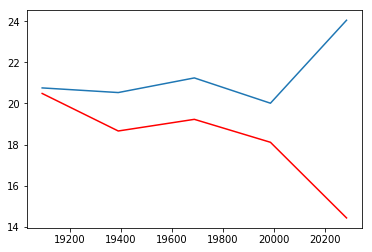

          Actual  Predicted
19090  20.757749  20.487253
19389  20.531898  18.660567
19688  21.244246  19.227800
19987  20.012967  18.110775
20286  24.052182  14.428612


In [94]:
modelFit(df_percentileOutputday_60,5,60)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=388.493, BIC=398.620, Fit time=0.269 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=413.699, BIC=417.750, Fit time=0.000 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=400.132, BIC=408.233, Fit time=0.079 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=389.980, BIC=398.081, Fit time=0.100 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=391.650, BIC=403.802, Fit time=0.421 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=414.854, BIC=422.956, Fit time=0.084 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=389.980, BIC=398.081, Fit

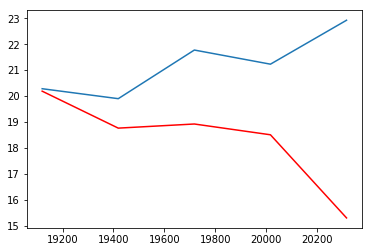

          Actual  Predicted
19120  20.281315  20.186568
19419  19.897010  18.759867
19718  21.774778  18.918974
20017  21.229134  18.502989
20316  22.925306  15.292882


In [95]:
modelFit(df_percentileOutputday_70,5,70)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=388.493, BIC=398.620, Fit time=0.269 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=413.699, BIC=417.750, Fit time=0.000 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=400.132, BIC=408.233, Fit time=0.078 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=389.980, BIC=398.081, Fit time=0.100 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=391.650, BIC=403.802, Fit time=0.470 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=414.854, BIC=422.956, Fit time=0.085 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=389.980, BIC=398.081, Fit

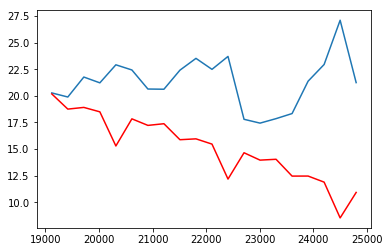

          Actual  Predicted
19120  20.281315  20.186568
19419  19.897010  18.759867
19718  21.774778  18.918974
20017  21.229134  18.502989
20316  22.925306  15.292882
20615  22.439778  17.843652
20914  20.647367  17.228054
21213  20.628501  17.385167
21512  22.422093  15.880939
21811  23.530031  15.962519
22110  22.498166  15.469005
22409  23.713463  12.181371
22708  17.800867  14.654613
23007  17.441262  13.961487
23306  17.863089  14.041073
23605  18.341073  12.459317
23904  21.384851  12.463369
24203  22.955569  11.892328
24502  27.115704   8.527166
24801  21.249888  10.922880


In [96]:
modelFit(df_percentileOutputday_60,20,60)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=388.493, BIC=398.620, Fit time=0.301 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=413.699, BIC=417.750, Fit time=0.000 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=400.132, BIC=408.233, Fit time=0.069 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=389.980, BIC=398.081, Fit time=0.116 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=391.650, BIC=403.802, Fit time=0.451 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=414.854, BIC=422.956, Fit time=0.100 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=389.980, BIC=398.081, Fit

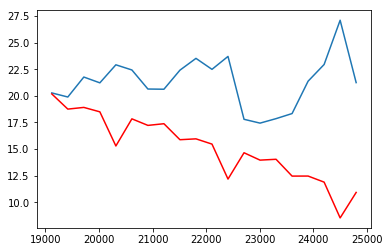

          Actual  Predicted
19120  20.281315  20.186568
19419  19.897010  18.759867
19718  21.774778  18.918974
20017  21.229134  18.502989
20316  22.925306  15.292882
20615  22.439778  17.843652
20914  20.647367  17.228054
21213  20.628501  17.385167
21512  22.422093  15.880939
21811  23.530031  15.962519
22110  22.498166  15.469005
22409  23.713463  12.181371
22708  17.800867  14.654613
23007  17.441262  13.961487
23306  17.863089  14.041073
23605  18.341073  12.459317
23904  21.384851  12.463369
24203  22.955569  11.892328
24502  27.115704   8.527166
24801  21.249888  10.922880


In [97]:
modelFit(df_percentileOutputday_70,20,70)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=388.896, BIC=399.023, Fit time=0.289 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=415.869, BIC=419.919, Fit time=0.009 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=402.512, BIC=410.614, Fit time=0.070 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=391.024, BIC=399.125, Fit time=0.190 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=390.829, BIC=402.981, Fit time=0.386 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=416.234, BIC=424.336, Fit time=0.101 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=391.025, BIC=399.126, Fit

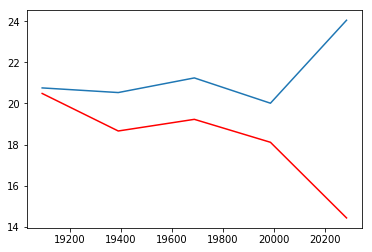

          Actual  Predicted
19090  20.757749  20.487253
19389  20.531898  18.660567
19688  21.244246  19.227800
19987  20.012967  18.110775
20286  24.052182  14.428612


In [105]:
modelFit(df_percentileOutput,5)